In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import vizdoom as vzd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from dddqn import DDDQN
from sum_tree import SumTree

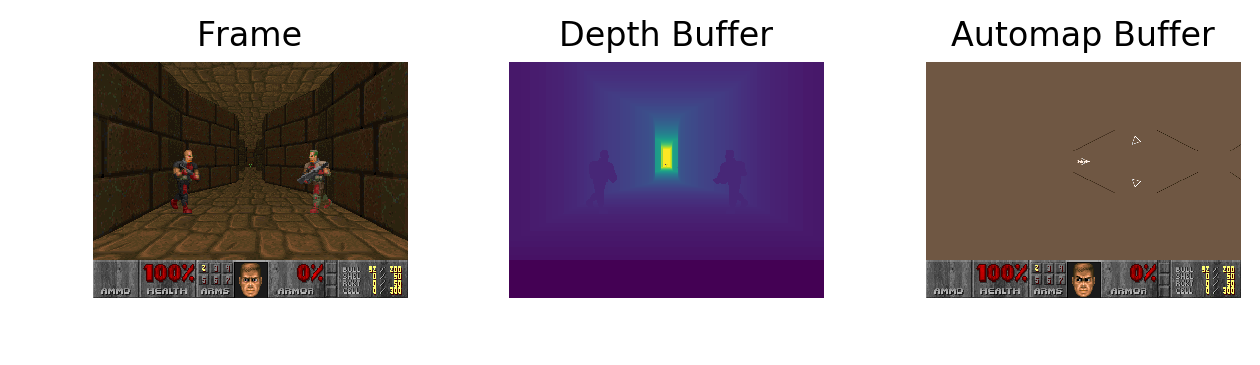

In [4]:
game = vzd.DoomGame()

game.load_config('scenarios/deadly_corridor.cfg')
game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)
game.set_labels_buffer_enabled(True)
game.set_depth_buffer_enabled(True)
game.set_automap_buffer_enabled(True)
game.set_automap_mode(vzd.AutomapMode.OBJECTS)
game.set_automap_rotate(False)
game.set_automap_render_textures(False)
game.set_render_hud(True)
game.set_render_minimal_hud(False)

game.init()
game.new_episode()
state = game.get_state()
game.close()

fig, ax = plt.subplots(figsize=(6.4, 4.8 * 3), dpi=200, ncols=3)

ax[0].imshow(np.rollaxis(state.screen_buffer, 0, 3))
ax[0].set_title('Frame')
ax[0].axis('off')

ax[1].imshow(state.depth_buffer)
ax[1].set_title('Depth Buffer')
ax[1].axis('off')

ax[2].imshow(np.rollaxis(state.automap_buffer, 0, 3))
ax[2].set_title('Automap Buffer')
ax[2].axis('off')

plt.tight_layout()

In [5]:
game.get_available_buttons_size()    

7

In [6]:
dddqn = DDDQN()
sum_tree = SumTree(10)